In [2]:
import pandas as pd
import numpy as np
# jieba:分词工具包
import jieba 
# re:正则表达式
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import font_manager

In [3]:
data = pd.read_csv(r'C:\Users\LX\Desktop\earphone_sentiment.csv')
data.head(5)

,content_id,content,subject,sentiment_word,sentiment_value
0,0,Silent Angel期待您的光临，共赏美好的声音！,其他,好,1
1,2,这只HD650在1k的失真左声道是右声道的6倍左右，也超出官方规格参数范围（0.05%），看...,其他,NaN,0
2,3,达音科 17周年 倒是数据最好看，而且便宜,配置,好,1
3,4,bose，beats，apple的消費者根本不知道有曲線的存在,其他,NaN,0
4,5,不错的数据,配置,不错,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17176 entries, 0 to 17175
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   content_id       17176 non-null  int64 
 1   content          17176 non-null  object
 2   subject          17176 non-null  object
 3   sentiment_word   4966 non-null   object
 4   sentiment_value  17176 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 671.1+ KB


In [5]:
data.shape

(17176, 5)

In [6]:
# tolist():把矩阵或数组转换成列表
sub = data['subject'].unique().tolist()
sent_word = data['sentiment_word'].unique().tolist()
sent_value = data['sentiment_value'].unique().tolist()
print('completed')

completed


不同主体占比
其他:0.7368421052631579
配置:0.13577084303679554
价格:0.0461690731252911
功能:0.009082440614811364
音质:0.058919422449930134
舒适:0.004017233348858873
外形:0.0091988821611551


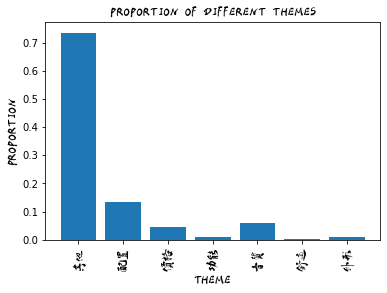

In [7]:
print('不同主体占比')
num_list = []
for i in sub:
    data_rate = len(data[data['subject']==i])/data.shape[0]
    print("{}:{}".format(i,data_rate))
    num_list.append(data_rate)

plt.bar(range(len(sub)), num_list)
# FontProperties类用于存储和操作字体的属性，ttf是字体包，需要选择包含中文的；fname后接的是字体包路径
my_font = font_manager.FontProperties(fname='YuWeiShuFaYunMoFanTi-2.ttf', size='large')
plt.xticks(range(len(sub)), sub, fontproperties=my_font, rotation=90)
plt.title('PROPORTION OF DIFFERENT THEMES', fontproperties=my_font)
plt.xlabel("THEME",fontproperties=my_font)
plt.ylabel("PROPORTION",fontproperties=my_font)
plt.show() 
    

In [8]:
print('不同情感占比')
for i in sent_value:
    data_rate = len(data[data['sentiment_value']==i])/data.shape[0]
    print("{}:{}".format(i, data_rate))

不同情感占比
1:0.25477410340009315
0:0.7108756404285049
-1:0.03435025617140196


In [9]:
print('不同情感词占比')
for i in sent_word:
    data_rate = len(data[data['sentiment_word']==i])/data.shape[0]
    print("{}:{}".format(i, data_rate))

不同情感词占比
好:0.19224499301350723
nan:0.0
不错:0.03312761993479273
呵呵:0.0013972985561248254
牛:0.007743362831858407
差:0.024161620866325104
疼:0.0008150908244061481
强:0.014205868653935725
骗:0.0012226362366092223
高级:0.0018048439683278994
精致:0.00040754541220307407
无语:0.00034932463903120635
水准:0.0006986492780624127
垃圾:0.0018630647414997672
难听:0.0012808570097810898
舒适:0.0009315323707498836
用心:0.0009315323707498836
追求:0.0015137401024685607
噪音:0.0009315323707498836
轰:0.0005822077317186772
不舒服:0.0002328830926874709
小巧:0.00017466231951560317
音染:0.0008150908244061481
惊艳:0.00040754541220307407
充足:0.00017466231951560317
上当:0.00011644154634373545
无奈:0.0002911038658593386
良心:0.00040754541220307407
混浊:5.8220773171867724e-05
辣鸡:0.00011644154634373545
模糊:0.00011644154634373545


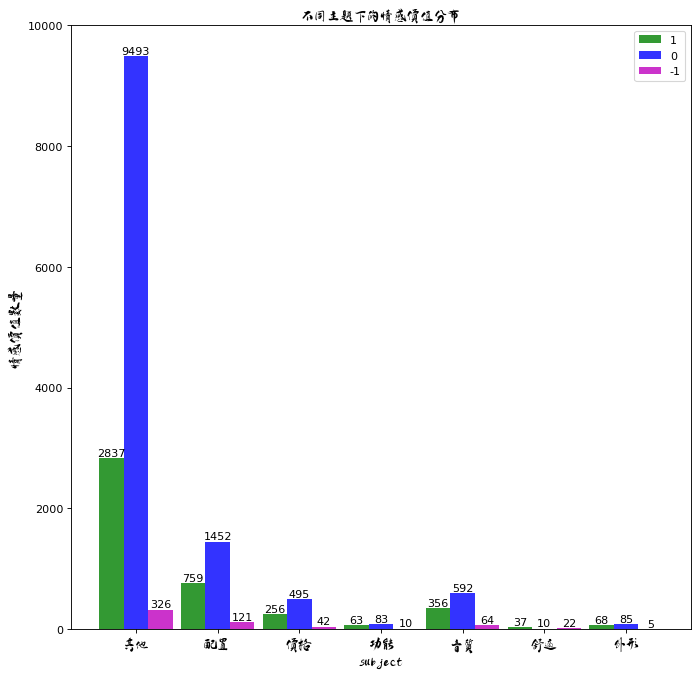

In [13]:
y1 = []
y0 = []
y_1 = []
for i in sub:
    a1 = len(data[(data['subject']==i)&(data['sentiment_value']==1)])
    y1.append(a1)
    a0 = len(data[(data['subject']==i)&(data['sentiment_value']==0)])
    y0.append(a0)
    a_1 = len(data[(data['subject']==i)&(data['sentiment_value']==-1)])
    y_1.append(a_1)

x = np.arange(len(sub))
bar_width = 0.3
tick_label = sub

plt.figure(figsize=(10,10), dpi=80)
plt.bar(x-bar_width, y1, bar_width, color="g", label='1', alpha=0.8)
plt.bar(x, y0, bar_width, color='b', label='0', alpha=0.8)
plt.bar(x+bar_width, y_1, bar_width, color='m', label='-1', alpha=0.8)

plt.xlabel('subject', fontproperties=my_font)
plt.ylabel('情感价值数量', fontproperties=my_font)
plt.title('不同主题下的情感价值分布', fontproperties=my_font)

for z,z1 in zip(x,y1):
    plt.text(z-bar_width, z1+0.05,'%s'%z1, ha='center', va='bottom')

for z,z2 in zip(x,y0):
    plt.text(z, z2+0.05,'%s'%z2, ha='center', va='bottom')


for z,z3 in zip(x,y_1):
    plt.text(z+bar_width, z3+0.05,'%s'%z3, ha='center', va='bottom')
    
plt.xticks(x, tick_label, fontproperties=my_font)
plt.yticks([0,2000,4000,6000,8000,10000])

plt.legend(loc='best')

plt.show()
